<a href="https://colab.research.google.com/github/MariaBlancoGonzalez/Machine-Learning-22/blob/main/notebooks/SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML2021 - Assesment Work (Regression)

The challenge is to predict Workers Compensation claims using realistic data.

**Model Evaluation**: MSE, $R^2$, MAE.

This work has been carried out by:

* María Blanco González-Mohíno
* Pablo Velasco Crespo
* José Alberto Seco Sánchez-Camacho
* Adrián Ruíz Esteban

## Data Loading 




1. Download the train data

In [57]:
!wget https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv

--2022-01-23 11:56:12--  https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv [following]
--2022-01-23 11:56:13--  https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4942050 (4.7M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]   4.71M  --.-KB/s    in 0.08s   

2022-01-23 11:56:13 (62.5 MB/s) - ‘train.csv.1’ saved [4942050/4942050]



In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree 

from IPython.display import Image
import pydot
from io import StringIO

from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn import preprocessing 

import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
from sklearn.neighbors import kneighbors_graph

import sklearn.neighbors
from sklearn.cluster import KMeans
from sklearn import metrics


Los datos son sobre reclamaciones


In [59]:
df = pd.read_csv("train.csv")
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


Tenemos que predecir la ultima fila (ultimate incurred claim cost)

The training set containing 30,000 insurance policies that you can use to train your model.

**Data fields**

-  ClaimNumber: Unique policy identifier
- DateTimeOfAccident: Date and time of accident
- DateReported: Date that accident was reported
- Age: Age of worker
- Gender: Gender of worker
- MaritalStatus: Martial status of worker. (M)arried, (S)ingle, (U)unknown.
- DependentChildren: The number of dependent children
- DependentsOther: The number of dependants excluding children
- WeeklyWages: Total weekly wage / Sueldo semanal
- PartTimeFullTime: Binary (P) or (F)
- HoursWorkedPerWeek: Total hours worked per week
- DaysWorkedPerWeek: Number of days worked per week
- ClaimDescription: Free text description of the claim / Descripcion que vamos a usar para el improvement.
- InitialIncurredClaimCost: Initial estimate by the insurer of the claim cost
- **UltimateIncurredClaimCost**: Total claims payments by the insurance company. This is the field you are asked to predict in the test set.
// 
Total de siniestros pagados por la compañía de seguros

In [60]:
df.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

## Preprocessing

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, ...



### Missing Values

It is necessary to address the missing values to improve the quality of the data that will be used to generate the models.


In [61]:
df.shape

(36176, 15)

In [62]:
pd.isnull(df).any()

ClaimNumber                  False
DateTimeOfAccident           False
DateReported                 False
Age                          False
Gender                       False
MaritalStatus                 True
DependentChildren            False
DependentsOther              False
WeeklyWages                   True
PartTimeFullTime             False
HoursWorkedPerWeek            True
DaysWorkedPerWeek            False
ClaimDescription             False
InitialIncurredCalimsCost    False
UltimateIncurredClaimCost    False
dtype: bool

In [63]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [64]:
df.shape

(36049, 15)

In [65]:
df.drop_duplicates()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,WC5624756,1996-05-29T09:00:00Z,1996-06-27T00:00:00Z,20,F,S,0,0,344.16,F,40.0,5,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,1400,1343.054886
36172,WC8516685,2002-10-08T08:00:00Z,2003-02-07T00:00:00Z,35,M,M,0,0,1668.83,F,71.0,7,LIFTING HOT WATER FROM TRAY BURN LEFT WRIST,1000,172876.632600
36173,WC6891668,1999-09-22T09:00:00Z,1999-11-11T00:00:00Z,52,F,M,0,0,204.87,P,20.0,4,REMOVING BROKEN GLASS LACERATED LEFT THUMB,500,632.281472
36174,WC4287842,1993-02-05T06:00:00Z,1993-03-19T00:00:00Z,28,M,M,0,0,730.87,F,38.0,5,FELL OVER SPRAINED ANKLE AND KNEE INJURY,4000,6714.495760


### OneHotEncoding 

[OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

Transforma categorias categóricas en categorias numericas

In [66]:
df['Gender'].values

array(['M', 'F', 'M', ..., 'F', 'M', 'M'], dtype=object)

In [67]:
df_OneHot = pd.get_dummies(df[['Gender','MaritalStatus', 'PartTimeFullTime']])
df_OneHot

,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,0,1,0,0,0,1,1,0
3,0,1,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
36171,1,0,0,0,1,0,1,0
36172,0,1,0,1,0,0,1,0
36173,1,0,0,1,0,0,0,1
36174,0,1,0,1,0,0,1,0


> At the begining only the numerical and the encoded features must be considered.

> At the end of the work you can include text, date information and so on.

In [68]:
df = pd.concat([df, df_OneHot], axis = 1)
df = df.loc[:,~df.columns.duplicated()]
df

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,1,0,1,0,0,1,0
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,0,1,0,0,1,0
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,1,0,0,0,1,1,0
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,1,0,0,1,0,1,0
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,WC5624756,1996-05-29T09:00:00Z,1996-06-27T00:00:00Z,20,F,S,0,0,344.16,F,40.0,5,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,1400,1343.054886,1,0,0,0,1,0,1,0
36172,WC8516685,2002-10-08T08:00:00Z,2003-02-07T00:00:00Z,35,M,M,0,0,1668.83,F,71.0,7,LIFTING HOT WATER FROM TRAY BURN LEFT WRIST,1000,172876.632600,0,1,0,1,0,0,1,0
36173,WC6891668,1999-09-22T09:00:00Z,1999-11-11T00:00:00Z,52,F,M,0,0,204.87,P,20.0,4,REMOVING BROKEN GLASS LACERATED LEFT THUMB,500,632.281472,1,0,0,1,0,0,0,1
36174,WC4287842,1993-02-05T06:00:00Z,1993-03-19T00:00:00Z,28,M,M,0,0,730.87,F,38.0,5,FELL OVER SPRAINED ANKLE AND KNEE INJURY,4000,6714.495760,0,1,0,1,0,0,1,0


### Train and test split

Caracteristicas para probar, podemos probar diferentes caracteristicas para probar los resultados

In [69]:
x_features = ['WeeklyWages', 'HoursWorkedPerWeek', 'InitialIncurredCalimsCost']

In [70]:

X = df[x_features]
y = df['UltimateIncurredClaimCost']
# Se puede cambiar el test_size (hay que)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## Basic Modeling 

We’ll be exploring Linear Regression using scikit-learn in python.

We will use the selected features to predict the results. 

Linear regression produces a model in the form:


 $$
 Y_{t}=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+\cdots +\beta _{p}X_{p}+\varepsilon
 $$

The way this is accomplished is by minimising the residual sum of squares, given by the equation below:
$$
RSS=Σni=1(yi–y^i)2
$$

$$
RSS=Σni=1(yi–β0^–β1^x1–β2^x2–…–βp^xp)
$$


Scikit-learn provides a LinearRegression function for doing this job.
Linear Regression (Dummy Model)

In [71]:

model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, which is an array of tuples of coefficients.

In [72]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for WeeklyWages is 9.794779343746388
The coefficient for HoursWorkedPerWeek is -25.675661234818307
The coefficient for InitialIncurredCalimsCost is 0.7743349854415342


Note that, because we’ve not done any feature scaling or dimensionality reduction, we can’t say anything about the relative importance of each of our features given these coefficients because the features are not of the same scale.

In [73]:
y_pred = model.predict(X_test)

In [74]:
# Evaluacion
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test)) # penalizar altas diferencias
print ("R^2:", metrics.r2_score(y_pred , y_test)) # importante mide nuestro resultado en funcion al real


MAE: 7979.755264779615
MAPE: 0.8024366465210745
MSE: 547594288.9830517
R^2: -1.5990659116870134


# 1. BaseLine (kNN or DecisionTrees)

- Feature Selection
- CrossValidation 
   - kNN: k, weights, metric (manhattan, euclidean)
   - Decisiontrees: max_depth


## Feature Selection and Dimensionality Reduction

Low correlation means there's no linear relationship; it doesn't mean there's no information in the feature that predicts the target.

In [75]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

# This one is for the improvement part too, so we dont remove yet the description
df_regressor= df.drop(labels=['ClaimNumber', 'DateReported', 'Gender','MaritalStatus','PartTimeFullTime'], axis=1)
df_regressor.head(4)

,DateTimeOfAccident,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F
0,2002-04-09T07:00:00Z,48,0,0,500.00,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,0,1,0,0,1
1,1999-01-07T11:00:00Z,43,0,0,509.34,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,1,0,0,1
2,1996-03-25T00:00:00Z,30,0,0,709.10,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,0,0,0,1,1
3,2005-06-22T13:00:00Z,41,0,0,555.46,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,0,0,1,0,1


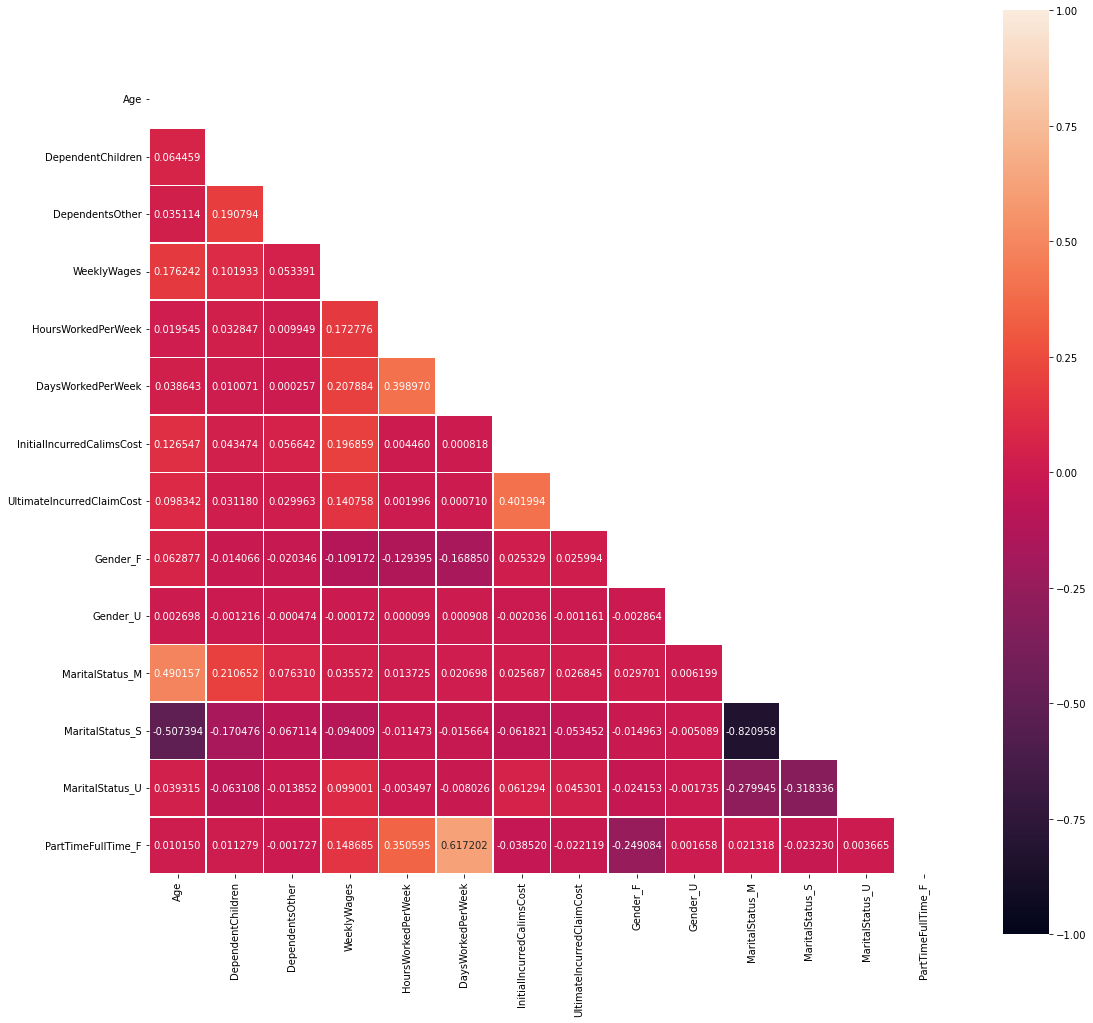

In [76]:
fig, ax = plt.subplots(figsize=(18, 17))


# adjust mask and df
mask = np.triu(np.ones_like(df_regressor.corr(), dtype=np.bool))
corr = df_regressor.iloc[0:,:-1].copy()
# plot heatmap
sns.heatmap(df_regressor.corr(), mask=mask,annot=True, square=True, linecolor='white', 
            fmt="f", linewidths=.5,  ax=ax, vmin=-1, vmax=1)
# yticks
plt.yticks(rotation=0)
plt.show()

As we find that the outliers has a big influence in the model, in this final one we decided to extract the outliers and treat them separated.

In [77]:
def get_outlier(df):
  upper_limit = df['UltimateIncurredClaimCost'].mean() + 3*df['UltimateIncurredClaimCost'].std()
  lower_limit = df['UltimateIncurredClaimCost'].mean() - 3*df['UltimateIncurredClaimCost'].std()

  new_df = df[((df['UltimateIncurredClaimCost'] <= lower_limit) | (df['UltimateIncurredClaimCost'] >= upper_limit))]
  
  return new_df

In [78]:
def remove_outlier(df):
  upper_limit = df['UltimateIncurredClaimCost'].mean() + 3*df['UltimateIncurredClaimCost'].std()
  lower_limit = df['UltimateIncurredClaimCost'].mean() - 3*df['UltimateIncurredClaimCost'].std()

  new_df = df[(df['UltimateIncurredClaimCost'] < upper_limit) & (df['UltimateIncurredClaimCost'] > lower_limit)]
  
  return new_df

In [79]:
df_outliers = get_outlier(df_regressor)
df_outliers

,DateTimeOfAccident,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F
222,2001-06-01T12:00:00Z,33,0,0,286.51,32.00,5,REDBACK SPIDER BITE RIGHT FOOT RIGHT FRACTURE,15000,195894.5513,1,0,0,1,0,1
245,2001-11-01T00:00:00Z,55,0,0,500.00,84.00,5,CABLE TRAY HIT KNEE ON BACK CHEST INJURY,175000,142803.1939,0,0,1,0,0,1
273,2000-12-21T13:00:00Z,46,0,0,500.00,38.00,5,HOT FAT BURNS RIGHT HAND AND FOOT,28000,119991.5057,1,0,1,0,0,1
308,2005-04-12T00:00:00Z,55,0,0,1500.00,40.00,5,LIFTING TROLLEY STRAIN RIGHT SHOULDER AND RIGH...,54600,128403.6699,0,0,1,0,0,1
309,1999-04-09T10:00:00Z,38,0,0,500.00,38.00,5,LIFTING BACK STRAIN LOWER BACK STRAIN,10000,151723.9885,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35959,2001-11-23T07:00:00Z,30,0,0,333.60,23.83,3,REPETITIVE WORK STRAIN LEFT SHOULDER,25000,125590.5187,0,0,0,0,1,0
35967,2003-09-30T13:00:00Z,56,0,0,499.96,30.90,5,LIFTING BRAKE DRUMS LEFT SHOULDER LEFT SHOULDER,60000,180657.0625,0,0,1,0,0,1
36097,2000-03-06T13:00:00Z,24,0,0,1.00,25.00,5,HANDLING BROCOLLI PAIN AND SWELLING LEFT KNEE ...,150000,525713.3241,0,0,0,1,0,0
36160,1995-03-08T10:00:00Z,20,0,0,139.50,8.00,3,MOTOR VEHICLE ACCIDENT MOTOR VEHICLE ACCIDENT ...,7500,309722.1878,0,0,0,0,1,0


In [80]:
df_regressor = remove_outlier(df_regressor)

# For improvement part about nlp
df_improvement = df_regressor.copy()
df_outliers_improvement = df_outliers.copy()

In [81]:
print(df.shape, df_regressor.shape)

(36049, 21) (35548, 16)


In [82]:
df_improvement.head(4)

,DateTimeOfAccident,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F
0,2002-04-09T07:00:00Z,48,0,0,500.00,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,0,1,0,0,1
1,1999-01-07T11:00:00Z,43,0,0,509.34,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,1,0,0,1
2,1996-03-25T00:00:00Z,30,0,0,709.10,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,0,0,0,1,1
3,2005-06-22T13:00:00Z,41,0,0,555.46,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,0,0,1,0,1


In [83]:
df_regressor = df_regressor.drop(labels=['ClaimDescription'], axis=1)
df_outlier =  df_outliers.drop(labels=['ClaimDescription'], axis=1)

In [84]:
df_regressor = remove_outlier(df_regressor)
df_regressor

,DateTimeOfAccident,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F
0,2002-04-09T07:00:00Z,48,0,0,500.00,38.0,5,1500,4748.203388,0,0,1,0,0,1
1,1999-01-07T11:00:00Z,43,0,0,509.34,37.5,5,5500,6326.285819,1,0,1,0,0,1
2,1996-03-25T00:00:00Z,30,0,0,709.10,38.0,5,1700,2293.949087,0,0,0,0,1,1
3,2005-06-22T13:00:00Z,41,0,0,555.46,38.0,5,15000,17786.487170,0,0,0,1,0,1
4,1990-08-29T08:00:00Z,36,0,0,377.10,38.0,5,2800,4014.002925,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36170,1996-06-10T05:00:00Z,21,0,0,456.00,38.0,5,13000,7914.441586,0,0,0,1,0,1
36171,1996-05-29T09:00:00Z,20,0,0,344.16,40.0,5,1400,1343.054886,1,0,0,1,0,1
36173,1999-09-22T09:00:00Z,52,0,0,204.87,20.0,4,500,632.281472,1,0,1,0,0,0
36174,1993-02-05T06:00:00Z,28,0,0,730.87,38.0,5,4000,6714.495760,0,0,1,0,0,1


In [85]:
features_selected = ['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren', 'DependentsOther', 'UltimateIncurredClaimCost']

In [86]:
df_regressor = df_regressor.set_index('DateTimeOfAccident')
df_outlier = df_outlier.set_index('DateTimeOfAccident')

In [87]:
df_regressor = df_regressor[features_selected]
df_outlier = df_outlier[features_selected]
df_regressor

,WeeklyWages,InitialIncurredCalimsCost,Age,DependentChildren,DependentsOther,UltimateIncurredClaimCost
DateTimeOfAccident,,,,,,
2002-04-09T07:00:00Z,500.00,1500,48,0,0,4748.203388
1999-01-07T11:00:00Z,509.34,5500,43,0,0,6326.285819
1996-03-25T00:00:00Z,709.10,1700,30,0,0,2293.949087
2005-06-22T13:00:00Z,555.46,15000,41,0,0,17786.487170
1990-08-29T08:00:00Z,377.10,2800,36,0,0,4014.002925
...,...,...,...,...,...,...
1996-06-10T05:00:00Z,456.00,13000,21,0,0,7914.441586
1996-05-29T09:00:00Z,344.16,1400,20,0,0,1343.054886
1999-09-22T09:00:00Z,204.87,500,52,0,0,632.281472


In this point we select some features, the one that we saw more relevant depending on previous iterations through the model.

In [88]:
# rest index avoid problems in cross validation
X = df_regressor[['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther']]
y = df_regressor['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=2)

In [89]:
X_train.reset_index(drop = True, inplace = True)
X_train.head(3)

,WeeklyWages,InitialIncurredCalimsCost,Age,DependentChildren,DependentsOther
0,500.0,1500,31,0,0
1,200.0,500,24,0,0
2,200.0,10000,43,0,0


In [90]:
X_test.head()

,WeeklyWages,InitialIncurredCalimsCost,Age,DependentChildren,DependentsOther
DateTimeOfAccident,,,,,
1991-05-29T13:00:00Z,500.0,5200,22,0,0
1998-02-05T08:00:00Z,200.0,150,54,0,0
1996-09-17T14:00:00Z,200.0,500,57,0,0
1996-04-18T20:00:00Z,200.0,16000,43,0,0
1989-07-27T07:00:00Z,364.0,420,36,0,0


Same as above to get the features.

In [91]:
X_outlier = df_outlier[['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther']]
y_outlier = df_outlier['UltimateIncurredClaimCost']
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split( X_outlier, y_outlier, test_size=0.3, random_state=2)

## KNN

In [92]:
def neigh_classi(cv, iterations, metric = 'minkowski'):
  score = []
  for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,iterations):
      fold_accuracy = []
      knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
       # verificar cada uno de los modelos con validación cruzada.
      for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
        fx_train = X_train.iloc[train_fold]
        fy_train = y_train.iloc[train_fold]
          # test
        fx_test = X_train.iloc[test_fold]
        fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
        knn.fit( X = fx_train, y = fy_train)
        y_pred = knn.predict(X = fx_test)
          # evaluación del modelo
        mae = mean_absolute_error(fy_test, y_pred)
        fold_accuracy.append(mae)
      total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
    plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
    print('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
    plt.ylabel('MAE')
    score.append(np.argmin(total_scores) + 1)


  plt.legend()
  plt.show()
  return score

Min Value uniform : 2321.7525747466434 (29)
Min Value distance : 2412.68560948867 (29)


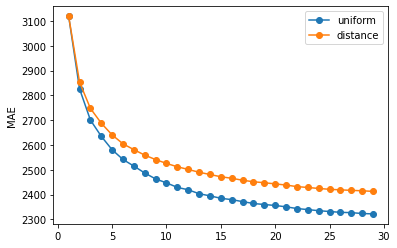

In [93]:
cv = KFold(n_splits = 10, shuffle = False) # shuffle == false cause we have temporal variable

neigh_m = neigh_classi(cv, 30, 'manhattan')

Once we have the number of neighbors, we compute the KNN algorithm, the first model to infer the UltimateIncurredClaims.

In [94]:
# constructor
n_neighbors = neigh_m[0]
weights = 'uniform'

knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights, metric = 'manhattan') 

# fit and predict
knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)


Metrics of KNN:

In [95]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 2401.2868509046757
MAPE: 0.5993424454581682
MSE: 25538683.93657822
R^2: 0.5621225444991983


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



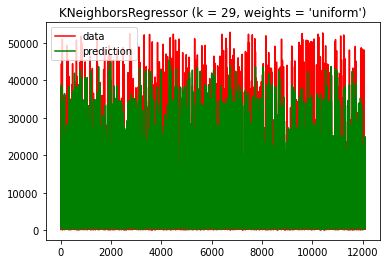

In [96]:

import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')

plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()


## Decision Trees

No handles with labels found to put in legend.


Min Value : 2322.376498978418 (5)


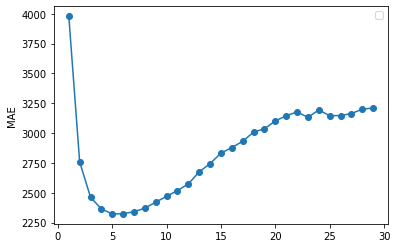

In [97]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 5, shuffle = True)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
depth = np.argmin(total_scores) + 1
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [98]:
from sklearn import tree
regr = tree.DecisionTreeRegressor(max_depth = depth)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=5)

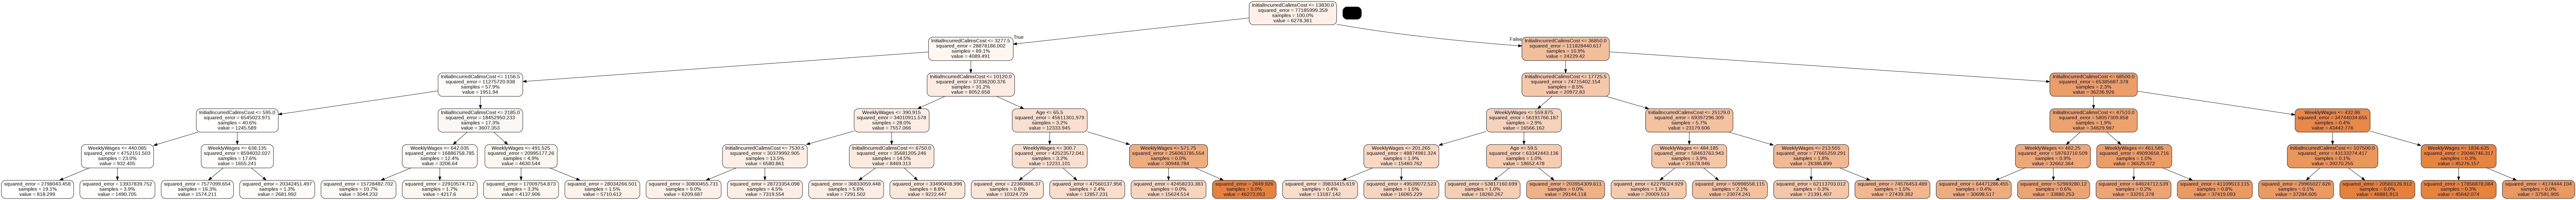

In [99]:
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther'], 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [100]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther') ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,WeeklyWages,0.014043
1,InitialIncurredCalimsCost,0.984092
2,Age,0.001865
3,DependentChildren,0.000000
4,DependentsOther,0.000000


In [101]:
y_pred = regr.predict(X_test)

In [102]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 2401.59402885506
MAPE: 0.5773547369247317
MSE: 25141678.28414718
R^2: 0.5661146454269335


## Outliers baseline

We removed the outliers before in order to make our model por accurate, but, what happen with them? Now, we are going to make some prediction with the outlier dataframe.

No handles with labels found to put in legend.


Min Value : 75628.56000348584 (4)


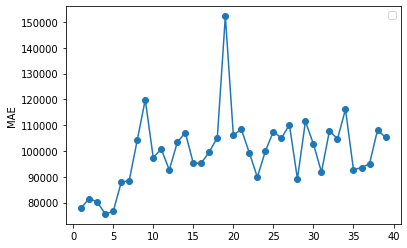

In [103]:
cv = KFold(n_splits = 10, shuffle = True)
total_scores = []
for i in range(1,40):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i)
       for train_fold, test_fold in cv.split(X_train_out):
          # División train test aleatoria
          # train
          fx_train = X_train_out.iloc[train_fold]
          fy_train = y_train_out.iloc[train_fold]
          # test
          fx_test = X_train_out.iloc[test_fold]
          fy_test = y_train_out.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
depth = np.argmin(total_scores) + 1
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')    
plt.legend()
plt.show() 

In [104]:
from sklearn import tree
regr = tree.DecisionTreeRegressor(max_depth = depth)
regr.fit(X_train_out, y_train_out)
regr

DecisionTreeRegressor(max_depth=4)

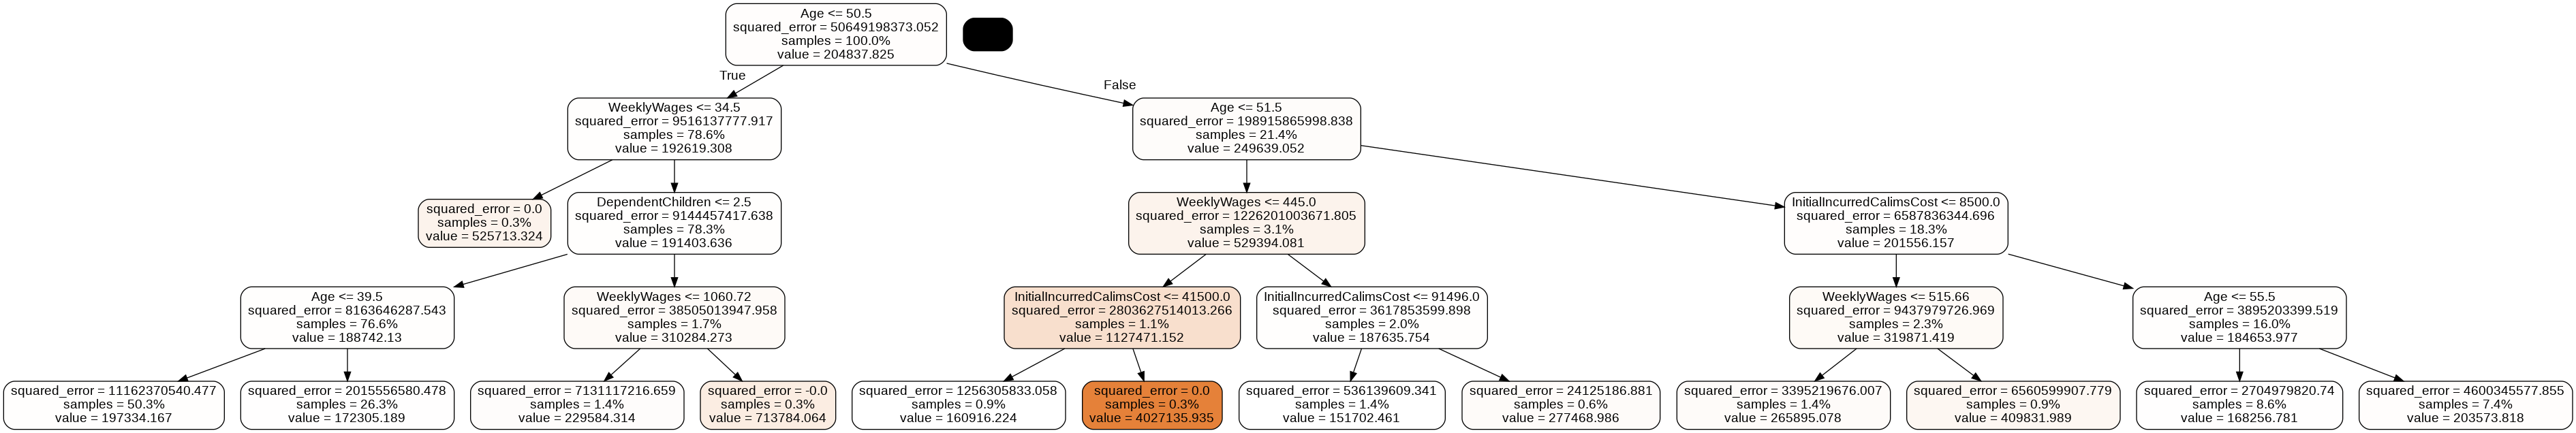

In [105]:
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther'], 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [106]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther') ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,WeeklyWages,0.169566
1,InitialIncurredCalimsCost,0.742685
2,Age,0.082083
3,DependentChildren,0.005667
4,DependentsOther,0.000000


In [107]:
y_pred = regr.predict(X_test_out)

In [108]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test_out))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test_out))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test_out))
print ("R^2:", metrics.r2_score(y_pred , y_test_out))

MAE: 65895.65584747432
MAPE: 0.3236995161773757
MSE: 10948484637.222652
R^2: -4.522701392437229


DependentsOthers is not so relevant but we decided to keep it just because we have it in the initial model.

In [109]:
def neigh_classi_outlier(cv, iterations, metric = 'minkowski'):
  score = []
  for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    
    for n_neighbors in range(1,iterations):
      fold_accuracy = []
      knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')

      for train_fold, test_fold in cv.split(X_train_out):

        fx_train = X_train_out.iloc[train_fold]
        fy_train = y_train_out.iloc[train_fold]
          # test
        fx_test = X_train_out.iloc[test_fold]
        fy_test = y_train_out.iloc[test_fold]

        knn.fit( X = fx_train, y = fy_train)
        y_pred = knn.predict(X = fx_test)
      
        mae = mean_absolute_error(fy_test, y_pred)
        fold_accuracy.append(mae)
      total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
    plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
    print('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
    plt.ylabel('MAE')
    score.append(np.argmin(total_scores) + 1)


  plt.legend()
  plt.show()
  return score

Min Value uniform : 78223.72962582858 (30)
Min Value distance : 81332.45267852719 (39)


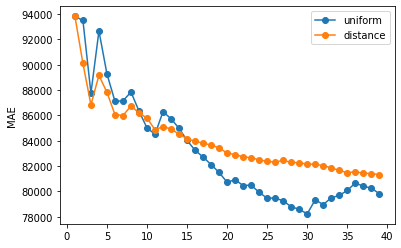

In [110]:
cv = KFold(n_splits = 10, shuffle = False) # shuffle == false cause we have temporal variable

neigh_m = neigh_classi_outlier(cv, 40, 'manhattan')

In [111]:
# constructor
n_neighbors = neigh_m[0]
weights = 'uniform'

knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights, metric = 'manhattan') 

# fit and predict
knn.fit( X = X_train_out, y = y_train_out)
y_pred = knn.predict(X = X_test_out)


In [112]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test_out))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test_out))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test_out))
print ("R^2:", metrics.r2_score(y_pred , y_test_out))

MAE: 63926.50598498895
MAPE: 0.3240709982202698
MSE: 9337334081.168108
R^2: -8.21735216429036


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



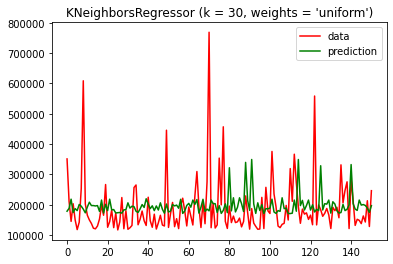

In [113]:
import numpy as np
xx = np.stack(i for i in range(y_test_out.shape[0]))
plt.plot(xx, y_test_out, c='r', label='data')

plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

**Conclusion**

The outlier model are not has good as the model without outlier, this was expected by us. Although this model is not good it works for us as removing it we obtain a great improvement in the other dataset, the one without outliers.

# 2. Optimized Model

In the next steps we are going to try to improve the model. We are going to do Random Forests with and without outlier, Boosting with Random Forest with outlier and Hyperparameter Optimization with Grid and Random Search.

## RandomForests

In [114]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators= 6, max_depth = depth, criterion='absolute_error', random_state=0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure (MAE) ",  mae)

Error Measure (MAE)  2205.292310786529


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



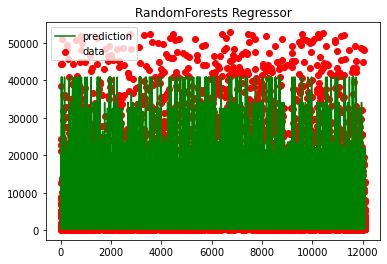

In [115]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [116]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther') ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,WeeklyWages,0.016965
1,InitialIncurredCalimsCost,0.983035
2,Age,0.000000
3,DependentChildren,0.000000
4,DependentsOther,0.000000


Errors are not bad, but feature relevancies are the worst we obtain.

## RandomForests with outliers

In [117]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 6, max_depth = depth, criterion='absolute_error', random_state=0)
#1.2 Model construction
regressor.fit(X_train_out, y_train_out)

# Test
y_pred = regressor.predict(X_test_out)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_out,y_pred)
print ("Error Measure (MAE) ",  mae)

Error Measure (MAE)  57451.166157339954


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



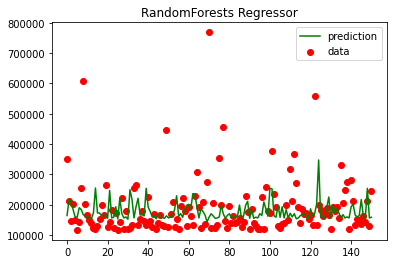

In [118]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test_out)))
plt.scatter(xx, y_test_out, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [119]:
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther') ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,WeeklyWages,0.372733
1,InitialIncurredCalimsCost,0.317585
2,Age,0.234529
3,DependentChildren,0.014355
4,DependentsOther,0.060798


This relevance makes sense, since we get outliers from quantiles 1 and 4, some claims (rows) have to have something that makes them outliers, some of their features differentiates them from reality.

## Boosting 

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
rng = np.random.RandomState(1)
# Fit regression model
regressors = []
regressors.append(DecisionTreeRegressor(max_depth=depth, criterion='absolute_error'))

regressors.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=depth, criterion='absolute_error'),
                          n_estimators=40, random_state=rng))

regressors.append(GradientBoostingRegressor(n_estimators=60, learning_rate=0.1,
                                   max_depth=depth, random_state=0, loss='absolute_error'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Error Measure 2257.266497347049


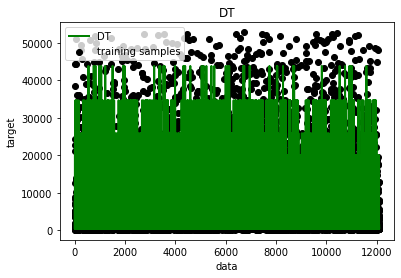

Error Measure 4504.938085786338


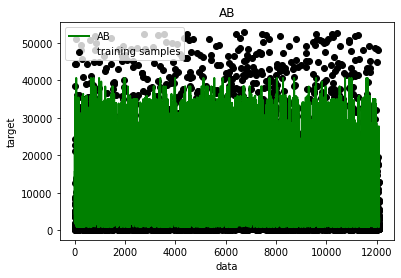

Error Measure 2129.7248121485172


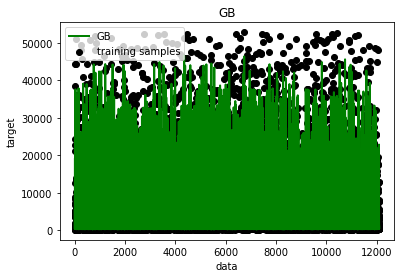

In [121]:
xx = np.stack(i for i in range(len(y_test)))
regr_names = ["DT", "AB", "GB"]
               
for i, r in enumerate(regressors):
    r.fit(X_train, y_train)
    y = r.predict(X_test)
    print ("Error Measure", mean_absolute_error(y_test,y))
    # Plot the results
    plt.figure()
    plt.scatter(xx, y_test, c="k", label="training samples")
    plt.plot(xx, y, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(regr_names[i])
    plt.axis('tight')
    plt.legend()
    plt.show()



Feature relevancies of each ensemble

In [122]:
print ('Feature Relevancies')
pd.DataFrame({'AAttributes': ('WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther') ,
              'Decision Tree':regressors[0].feature_importances_, 
              'AdaBoostRegressor': regressors[1].feature_importances_,
              'GradientBoostingRegressor': regressors[2].feature_importances_ })

Feature Relevancies


'\\begin{tabular}{llrrr}\n\\toprule\n{} &                AAttributes &  Decision Tree &  AdaBoostRegressor &  GradientBoostingRegressor \\\\\n\\midrule\n0 &                WeeklyWages &       0.017152 &           0.317271 &                   0.042277 \\\\\n1 &  InitialIncurredCalimsCost &       0.982848 &           0.479476 &                   0.940764 \\\\\n2 &                        Age &       0.000000 &           0.193455 &                   0.015942 \\\\\n3 &          DependentChildren &       0.000000 &           0.009790 &                   0.000998 \\\\\n4 &            DependentsOther &       0.000000 &           0.000007 &                   0.000019 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Hyperparameter Optimization

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [124]:
# rest index avoid problems in cross validation
X = df_regressor[['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther']]
y = df_regressor['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=40)

In [125]:
regressor = RandomForestRegressor() 
regressor

RandomForestRegressor()

In [126]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#### Grid Search

In [127]:
param_dist = {"n_estimators": [8, 16, 32, 64], 
              "max_features": ['auto', 'sqrt'], 
              "max_depth": [16,8,4,2], 
              "bootstrap": [True, False]
            }

In [128]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

# Fit the random search model
grid_regres.fit(X = X_train, y = y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [16, 8, 4, 2],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [8, 16, 32, 64]})

In [129]:
report(grid_regres.cv_results_, n_top = 3)

Model with rank: 1
Mean validation score: 0.717 (std: 0.023)
Parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 64}

Model with rank: 2
Mean validation score: 0.716 (std: 0.023)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 32}

Model with rank: 3
Mean validation score: 0.716 (std: 0.023)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 64}



In [130]:
grid_regres.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=64)

In [131]:
# choose the best
best_grid = grid_regres.best_estimator_

# fit and predict
best_grid.fit( X = X_train, y = y_train)
y_pred = best_grid.predict(X = X_test)

In [132]:
# EVALUATE 
from sklearn.metrics import mean_absolute_error
print ('MAE', mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE 2351.7742019935604
MAPE: 0.5693124013284108
MSE: 25353431.833254475
R^2: 0.5353021435941709


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



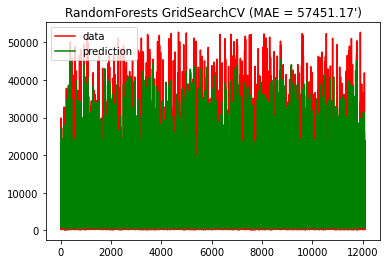

In [133]:
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [134]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','DependentsOther') ,
              'Decision Tree': best_grid.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,WeeklyWages,0.041961
1,InitialIncurredCalimsCost,0.937950
2,Age,0.017719
3,DependentChildren,0.002330
4,DependentsOther,0.000040


### RandomizedSearch

Random search hyper parameters, we do this type of hyperparametrization although random models are not optimal.

In [135]:
param_dist = {"n_estimators": [4, 8, 16, 32], 
              "max_features": ['auto', 'sqrt'], 
              "max_depth": [16,8, 4, 2], 
              "min_samples_split": sp_randint(2, 25), 
              "min_samples_leaf": sp_randint(1, 25),
              "criterion": ["squared_error", "mae"]}

In [136]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 30, cv = 3, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error', 'mae'],
                                        'max_depth': [16, 8, 4, 2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff37aa00590>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff37aa40510>,
                                        'n_estimators': [4, 8, 16, 32]},
                   random_state=0)

In [137]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.719 (std: 0.012)
Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 24, 'n_estimators': 32}

Model with rank: 2
Mean validation score: 0.717 (std: 0.012)
Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 21, 'min_samples_split': 13, 'n_estimators': 4}

Model with rank: 3
Mean validation score: 0.717 (std: 0.012)
Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 32}

Model with rank: 4
Mean validation score: 0.716 (std: 0.012)
Parameters: {'criterion': 'squared_error', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 16, 'n_estimators': 16}

Model with rank: 5
Mean validation score: 0.716 (std: 0.010)
Parameters: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'm

In [138]:
rnd_regres.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 11,
 'min_samples_split': 24,
 'n_estimators': 32}

In [139]:
# choose the best

best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X =X_train, y = y_train)
y_pred = best_random.predict(X = X_test)

# EVALUATE 
from sklearn.metrics import mean_absolute_error
print ('MAE', mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE 2343.3125937787718
MAPE: 0.5689162477282568
MSE: 25198024.698326502
R^2: 0.5409286890045985


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



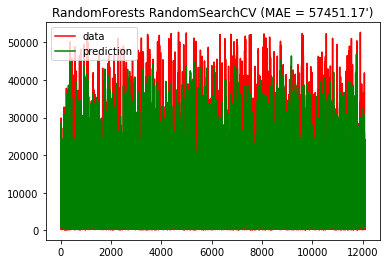

In [140]:
from sklearn.metrics import mean_absolute_error
                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

**Conclusion**

As  a  result,  we  think  that  the  best  model  to  choose  is  the  one  madewith GridSearchCV, since we have the best errors so far and one of the best relevance distributions

# 3. Improvements (Include text data, other changes)

In [141]:
!pip install langdetect
from langdetect import detect
import re

In [147]:
description = df_improvement[['ClaimDescription']]
description_outlier = df_outliers_improvement[['ClaimDescription']]
description.head(10)

,ClaimDescription
0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY
1,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...
2,CUT ON SHARP EDGE CUT LEFT THUMB
3,DIGGING LOWER BACK LOWER BACK STRAIN
4,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...
5,STRUCK HEAD ON HEAD LACERATED HEAD
6,FINGER BRUISED AND SWOLLEN LEFT ARM
7,CLEANING LEFT SHOULDER SPLINTER LEFT HAND
8,JACK SLIPPED CATCHING FINGER CUT LEFT LITTLE F...
9,STRUCK PINE DUST ABRASION LEFT EYE IRRITATION


## Preprocessing step



In [148]:
text_list = description['ClaimDescription'].tolist()
detect(text_list[0])

'en'

Language of the text: English.

Next steps will be develop taking into account the text has been writing in English.

## Remove useless data and all capital letters 

Here is were we extract the useless symbols and set all text to lower words

In [149]:
def remove_useless_data(df):
  useless_symbols = '!"_$%&/()=_ˆ*¡@'
  df['text_without_symbols'] = df.apply(lambda row:
                                          re.sub(useless_symbols, '', row['ClaimDescription'], flags=re.ASCII), axis=1)
  df['text_without_symbols'] = df.apply(lambda row: row['text_without_symbols'].lower(), axis=1)

In [150]:
remove_useless_data(description)
remove_useless_data(description_outlier)
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ClaimDescription,text_without_symbols
0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,lifting tyre injury to right arm and wrist injury
1,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,stepped around crates and truck tray fracture ...
2,CUT ON SHARP EDGE CUT LEFT THUMB,cut on sharp edge cut left thumb
3,DIGGING LOWER BACK LOWER BACK STRAIN,digging lower back lower back strain
4,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,reaching above shoulder level acute muscle str...
...,...,...
36170,DUST FROM AREA LODGED IN RIGHT HAND,dust from area lodged in right hand
36171,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,walked into door bruised left knee pain
36173,REMOVING BROKEN GLASS LACERATED LEFT THUMB,removing broken glass lacerated left thumb
36174,FELL OVER SPRAINED ANKLE AND KNEE INJURY,fell over sprained ankle and knee injury


In [151]:
x = description.apply(lambda row: re.findall(u'!"_$%&/()=_ˆ*¡@', row['text_without_symbols']), axis = 1)
for i in x:
  if i != []:
    print(i)

In [152]:
x = description_outlier.apply(lambda row: re.findall(u'!"_$%&/()=_ˆ*¡@', row['text_without_symbols']), axis = 1)
for i in x:
  if i != []:
    print(i)

In [153]:
description.head(5)

,ClaimDescription,text_without_symbols
0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,lifting tyre injury to right arm and wrist injury
1,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,stepped around crates and truck tray fracture ...
2,CUT ON SHARP EDGE CUT LEFT THUMB,cut on sharp edge cut left thumb
3,DIGGING LOWER BACK LOWER BACK STRAIN,digging lower back lower back strain
4,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,reaching above shoulder level acute muscle str...


In [154]:
description.shape

(35548, 2)

In [155]:
description_outlier.head(3)

,ClaimDescription,text_without_symbols
222,REDBACK SPIDER BITE RIGHT FOOT RIGHT FRACTURE,redback spider bite right foot right fracture
245,CABLE TRAY HIT KNEE ON BACK CHEST INJURY,cable tray hit knee on back chest injury
273,HOT FAT BURNS RIGHT HAND AND FOOT,hot fat burns right hand and foot


## Remove Contractions

Those are all contractions that we are going to change

In [156]:
contractions = { 
"a'ight":"alright",
"ain't": "am not",
"amn't":"am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'll": "how will",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

Method to replace all contractions

In [157]:
def replace_contractions(sentence):
  sentence= sentence.split(" ")
  for word in sentence:
    if word in contractions:
      sentence.replace(word, contractions.get(word))
  return ' '.join(sentence)

In [158]:
def remove_contractions(df):
  df['text_no_contractions'] = df.apply(lambda row: replace_contractions(row['text_without_symbols']), axis=1)

In [159]:
remove_contractions(description)
remove_contractions(description_outlier)
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ClaimDescription,text_without_symbols,text_no_contractions
0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,lifting tyre injury to right arm and wrist injury,lifting tyre injury to right arm and wrist injury
1,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,stepped around crates and truck tray fracture ...,stepped around crates and truck tray fracture ...
2,CUT ON SHARP EDGE CUT LEFT THUMB,cut on sharp edge cut left thumb,cut on sharp edge cut left thumb
3,DIGGING LOWER BACK LOWER BACK STRAIN,digging lower back lower back strain,digging lower back lower back strain
4,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,reaching above shoulder level acute muscle str...,reaching above shoulder level acute muscle str...
...,...,...,...
36170,DUST FROM AREA LODGED IN RIGHT HAND,dust from area lodged in right hand,dust from area lodged in right hand
36171,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,walked into door bruised left knee pain,walked into door bruised left knee pain
36173,REMOVING BROKEN GLASS LACERATED LEFT THUMB,removing broken glass lacerated left thumb,removing broken glass lacerated left thumb
36174,FELL OVER SPRAINED ANKLE AND KNEE INJURY,fell over sprained ankle and knee injury,fell over sprained ankle and knee injury


## Delete repeated words

In [160]:
def delete_repeated(text):
    text = text.split(" ")
    return " ".join([text[i] for i in range(len(text)) if i==0 or text[i]!=text[i-1]])

In [161]:
def remove_repeated_words(df):
  df['text_without_repeated_words'] = df.apply(lambda row: delete_repeated(row['text_no_contractions']), axis=1)

Here we delete the repeated words like 'great great ...'

In [162]:
remove_repeated_words(description)
remove_repeated_words(description_outlier)
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ClaimDescription,text_without_symbols,text_no_contractions,text_without_repeated_words
0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,lifting tyre injury to right arm and wrist injury,lifting tyre injury to right arm and wrist injury,lifting tyre injury to right arm and wrist injury
1,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,stepped around crates and truck tray fracture ...,stepped around crates and truck tray fracture ...,stepped around crates and truck tray fracture ...
2,CUT ON SHARP EDGE CUT LEFT THUMB,cut on sharp edge cut left thumb,cut on sharp edge cut left thumb,cut on sharp edge cut left thumb
3,DIGGING LOWER BACK LOWER BACK STRAIN,digging lower back lower back strain,digging lower back lower back strain,digging lower back lower back strain
4,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,reaching above shoulder level acute muscle str...,reaching above shoulder level acute muscle str...,reaching above shoulder level acute muscle str...
...,...,...,...,...
36170,DUST FROM AREA LODGED IN RIGHT HAND,dust from area lodged in right hand,dust from area lodged in right hand,dust from area lodged in right hand
36171,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,walked into door bruised left knee pain,walked into door bruised left knee pain,walked into door bruised left knee pain
36173,REMOVING BROKEN GLASS LACERATED LEFT THUMB,removing broken glass lacerated left thumb,removing broken glass lacerated left thumb,removing broken glass lacerated left thumb
36174,FELL OVER SPRAINED ANKLE AND KNEE INJURY,fell over sprained ankle and knee injury,fell over sprained ankle and knee injury,fell over sprained ankle and knee injury


## Lemmatizer

In [163]:
import nltk
nltk.download("popular")

from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [164]:
def lemmatize_text(text):
  # Set the text string to tokens with word_tokenize
  lemmatizer = WordNetLemmatizer()
  word_list = nltk.word_tokenize(text)
  return (' '.join([lemmatizer.lemmatize(w) for w in word_list]))

In [165]:
def lemmatizer(df):
  
  text_lemmatized = df['text_without_repeated_words'].tolist()
  text_lemma = []
  for text in text_lemmatized:
    text_lemma.append(lemmatize_text(text))

  df['text_lemmatized'] = text_lemma
  df.head(4)

The method choose to compute the lemmatize part is the WordNetLemmatizer

In [166]:
lemmatizer(description)
lemmatizer(description_outlier)
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ClaimDescription,text_without_symbols,text_no_contractions,text_without_repeated_words,text_lemmatized
0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,lifting tyre injury to right arm and wrist injury,lifting tyre injury to right arm and wrist injury,lifting tyre injury to right arm and wrist injury,lifting tyre injury to right arm and wrist injury
1,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,stepped around crates and truck tray fracture ...,stepped around crates and truck tray fracture ...,stepped around crates and truck tray fracture ...,stepped around crate and truck tray fracture l...
2,CUT ON SHARP EDGE CUT LEFT THUMB,cut on sharp edge cut left thumb,cut on sharp edge cut left thumb,cut on sharp edge cut left thumb,cut on sharp edge cut left thumb
3,DIGGING LOWER BACK LOWER BACK STRAIN,digging lower back lower back strain,digging lower back lower back strain,digging lower back lower back strain,digging lower back lower back strain
4,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,reaching above shoulder level acute muscle str...,reaching above shoulder level acute muscle str...,reaching above shoulder level acute muscle str...,reaching above shoulder level acute muscle str...
...,...,...,...,...,...
36170,DUST FROM AREA LODGED IN RIGHT HAND,dust from area lodged in right hand,dust from area lodged in right hand,dust from area lodged in right hand,dust from area lodged in right hand
36171,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,walked into door bruised left knee pain,walked into door bruised left knee pain,walked into door bruised left knee pain,walked into door bruised left knee pain
36173,REMOVING BROKEN GLASS LACERATED LEFT THUMB,removing broken glass lacerated left thumb,removing broken glass lacerated left thumb,removing broken glass lacerated left thumb,removing broken glass lacerated left thumb
36174,FELL OVER SPRAINED ANKLE AND KNEE INJURY,fell over sprained ankle and knee injury,fell over sprained ankle and knee injury,fell over sprained ankle and knee injury,fell over sprained ankle and knee injury


## Vectorization

In [167]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [168]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=50)

In [169]:
def vectorization(df):
  df['tokens'] = [word_tokenize(sentence) for sentence in df['text_lemmatized']]
  tagged = df['tokens'].apply(nltk.pos_tag)
  pos_tag = []
  sentence = ''
  for comment in tagged:
    line = ''
    sentence = ''
    for word in comment:
      line = f'{word[0]}:{word[1]}'
      sentence += ' '+ ''.join(line)
    pos_tag.append(sentence)
  df['pos_tag'] = pos_tag
  data = vectorizer.fit_transform(df['pos_tag'])
  print("vocabulary: ", vectorizer.vocabulary_)

  df_ngrams_pos =pd.DataFrame(data.toarray(),columns = vectorizer.get_feature_names_out())
  return df_ngrams_pos

In [170]:
df_ngrams_pos = vectorization(description)
df_ngrams_pos_outlier = vectorization(description_outlier)
df_ngrams_pos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



vocabulary:  {'lifting': 22, 'vbg': 48, 'jj': 15, 'nn': 27, 'right': 39, 'and': 0, 'cc': 5, 'lifting vbg': 23, 'right jj': 40, 'nn and': 28, 'and cc': 1, 'nn and cc': 29, 'vbn': 49, 'in': 14, 'left': 20, 'vbd': 47, 'nn left': 30, 'left vbd': 21, 'nn left vbd': 31, 'lower': 24, 'back': 2, 'rb': 37, 'jjr': 16, 'strain': 44, 'back rb': 3, 'lower jjr': 25, 'jjr back': 17, 'nn strain': 35, 'strain nn': 45, 'lower jjr back': 26, 'nn strain nn': 36, 'shoulder': 41, 'shoulder nn': 42, 'struck': 46, 'finger': 10, 'finger nn': 11, 'hand': 12, 'hand nn': 13, 'slipped': 43, 'eye': 6, 'eye nn': 7, 'nn right': 33, 'nn right jj': 34, 'laceration': 18, 'laceration nn': 19, 'rb strain': 38, 'back rb strain': 4, 'fell': 8, 'fell vbd': 9, 'nn lower': 32}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



vocabulary:  {'nn': 24, 'right': 38, 'jj': 11, 'nn right': 31, 'right jj': 39, 'nn right jj': 32, 'vbd': 47, 'in': 8, 'back': 2, 'injury': 9, 'injury nn': 10, 'and': 0, 'cc': 5, 'nn and': 25, 'and cc': 1, 'nn and cc': 26, 'lifting': 19, 'vbg': 48, 'strain': 45, 'shoulder': 42, 'lifting vbg': 20, 'nn strain': 33, 'strain nn': 46, 'jj shoulder': 12, 'shoulder nn': 43, 'nn strain nn': 34, 'right jj shoulder': 40, 'jj shoulder nn': 13, 'rb': 35, 'lower': 21, 'back rb': 3, 'rb strain': 36, 'nn lower': 29, 'back rb strain': 4, 'rb strain nn': 37, 'vbn': 49, 'left': 17, 'rp': 41, 'left vbd': 18, 'nn left': 27, 'nn left vbd': 28, 'slipped': 44, 'jjr': 14, 'lower jjr': 22, 'jjr back': 15, 'nn lower jjr': 30, 'lower jjr back': 23, 'jjr back rb': 16, 'fell': 6, 'fell vbd': 7}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,and,and cc,back,back rb,back rb strain,cc,eye,eye nn,fell,fell vbd,finger,finger nn,hand,hand nn,in,jj,jjr,jjr back,laceration,laceration nn,left,left vbd,lifting,lifting vbg,lower,lower jjr,lower jjr back,nn,nn and,nn and cc,nn left,nn left vbd,nn lower,nn right,nn right jj,nn strain,nn strain nn,rb,rb strain,right,right jj,shoulder,shoulder nn,slipped,strain,strain nn,struck,vbd,vbg,vbn
0,0.282888,0.282888,0.000000,0.000000,0.0,0.281645,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.438417,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.281130,0.285673,0.000000,0.000000,0.000000,0.291099,0.308017,0.308017,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.203306,0.237049,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.189100,0.000000
1,0.291379,0.291379,0.000000,0.000000,0.0,0.290098,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.212879,0.150525,0.000000,0.000000,0.0,0.0,0.216312,0.232551,0.000000,0.000000,0.000000,0.000000,0.000000,0.399782,0.317261,0.317261,0.258342,0.259118,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.157078,0.000000,0.239796
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.308940,0.218450,0.000000,0.000000,0.0,0.0,0.313922,0.337490,0.000000,0.000000,0.000000,0.000000,0.000000,0.435137,0.000000,0.000000,0.374918,0.376044,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.227959,0.000000,0.348004
3,0.000000,0.000000,0.408556,0.223298,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.245553,0.258411,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.472152,0.253916,0.258529,0.164984,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.253024,0.254592,0.177749,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.209052,0.211447,0.0,0.000000,0.160762,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.361079,0.127658,0.000000,0.000000,0.0,0.0,0.183451,0.197224,0.000000,0.000000,0.000000,0.000000,0.000000,0.508574,0.000000,0.000000,0.219096,0.219754,0.0,0.0,0.0,0.259988,0.261599,0.000000,0.0,0.000000,0.000000,0.274076,0.276236,0.0,0.214806,0.217267,0.0,0.133215,0.165187,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35543,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.329659,0.329659,0.684448,0.161323,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321345,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.224430,0.261679,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.256998
35544,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.303873,0.000000,0.000000,0.000000,0.0,0.0,0.308773,0.331955,0.000000,0.000000,0.000000,0.000000,0.000000,0.428001,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.224220,0.000000,0.684593
35545,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.274767,0.000000,0.000000,0.0,0.0,0.394853,0.424497,0.000000,0.000000,0.000000,0.000000,0.000000,0.364879,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.573455,0.355542,0.000000
35546,0.320782,0.320782,0.000000,0.000000,0.0,0.319373,0.0,0.0,0.360577,0.360577,0.0,0.0,0.000000,0.000000,0.000000,0.331430,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220062,0.349277,0.349277,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0000

## Model without outliers

### Feature Selection

In [171]:
# rest index avoid problems in cross validation
X = df_ngrams_pos
y = df_improvement['UltimateIncurredClaimCost']
y

0         4748.203388
1         6326.285819
2         2293.949087
3        17786.487170
4         4014.002925
             ...     
36170     7914.441586
36171     1343.054886
36173      632.281472
36174     6714.495760
36175     2588.845117
Name: UltimateIncurredClaimCost, Length: 35548, dtype: float64

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.32)

Decission tree to get the depth:

No handles with labels found to put in legend.


Min Value : 7841.68617047638 (7)


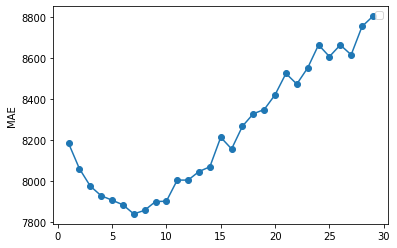

In [173]:
cv = KFold(n_splits = 5, shuffle = True)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
depth = np.argmin(total_scores) + 1
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

### RandomForests

In [174]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 4, max_depth = depth, criterion='absolute_error', random_state=2)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 6419.971224679538
MAPE: 2.3296211044707604
MSE: 233487012.88729078
R^2: -18.183556542327885


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



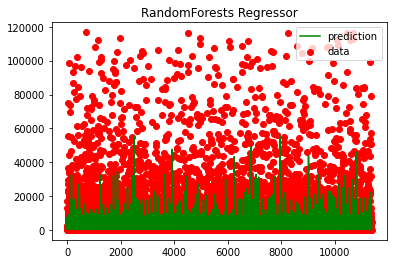

In [175]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [176]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': (vectorizer.get_feature_names_out()) ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,and,0.001717
1,and cc,0.002838
2,back,0.473576
3,back rb,0.000132
4,back rb strain,0.000000
5,cc,0.004186
6,fell,0.017729
7,fell vbd,0.018868
8,in,0.000811
9,injury,0.000048


## Model of outliers

### Feature Selection

In [177]:
# rest index avoid problems in cross validation
X = df_ngrams_pos_outlier
y = df_outliers_improvement['UltimateIncurredClaimCost']
y

222      195894.5513
245      142803.1939
273      119991.5057
308      128403.6699
309      151723.9885
            ...     
35959    125590.5187
35967    180657.0625
36097    525713.3241
36160    309722.1878
36172    172876.6326
Name: UltimateIncurredClaimCost, Length: 501, dtype: float64

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

Decission tree to get the depth:

No handles with labels found to put in legend.


Min Value : 82723.34336973316 (3)


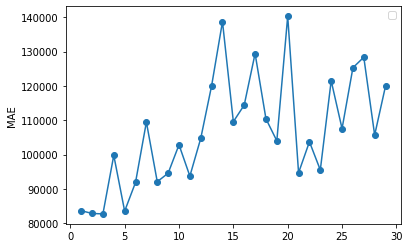

In [179]:
cv = KFold(n_splits = 5, shuffle = True)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
depth = np.argmin(total_scores) + 1
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

### RandomForests

In [180]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 4, max_depth = depth, criterion='absolute_error', random_state=2)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 64530.63157069536
MAPE: 0.3750782518425404
MSE: 11832891309.833838
R^2: -6.528012234542427


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



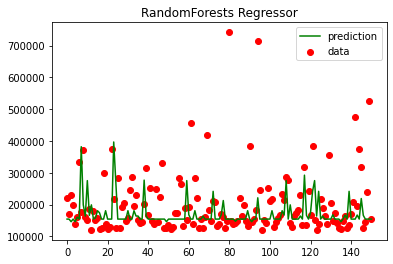

In [181]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [182]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': (vectorizer.get_feature_names_out()) ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,and,0.000000
1,and cc,0.000000
2,back,0.000000
3,back rb,0.000000
4,back rb strain,0.000000
5,cc,0.000000
6,fell,0.076578
7,fell vbd,0.199404
8,in,0.000000
9,injury,0.000000


**Conclusion**

Regarding NLP model, if we look closely at the graph of the KNN-CV we can see it is maybe overfitting, so maybe that is why the model is not that good.